# QUESTION - 1(gas_turbines.csv)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("gas_turbines.csv")

In [ ]:
df.shape

(15039, 11)

In [ ]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [3]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
# split into input (X) and output (Y) variables
X = df[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]

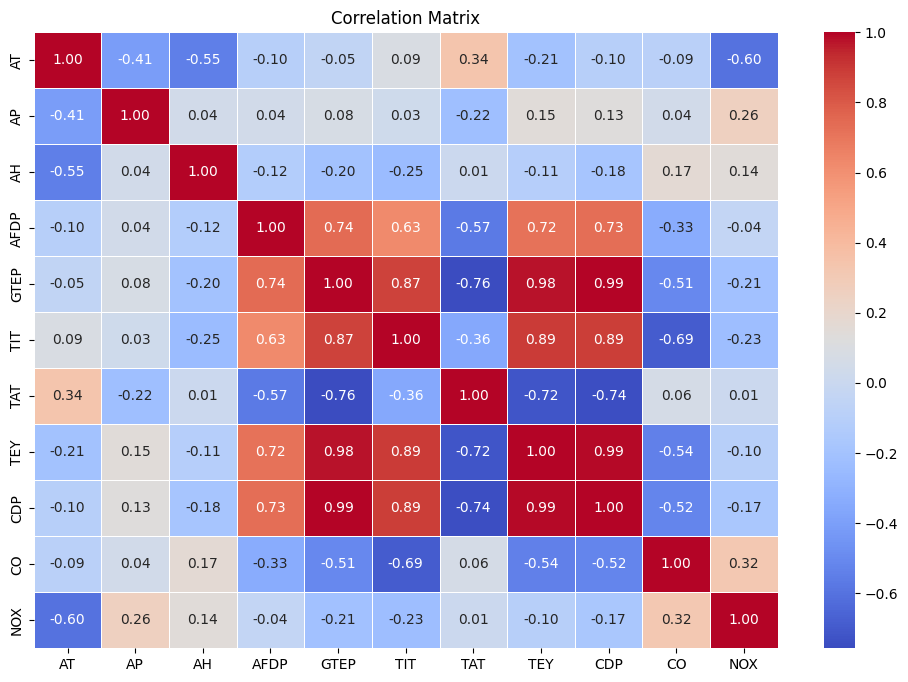

In [4]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

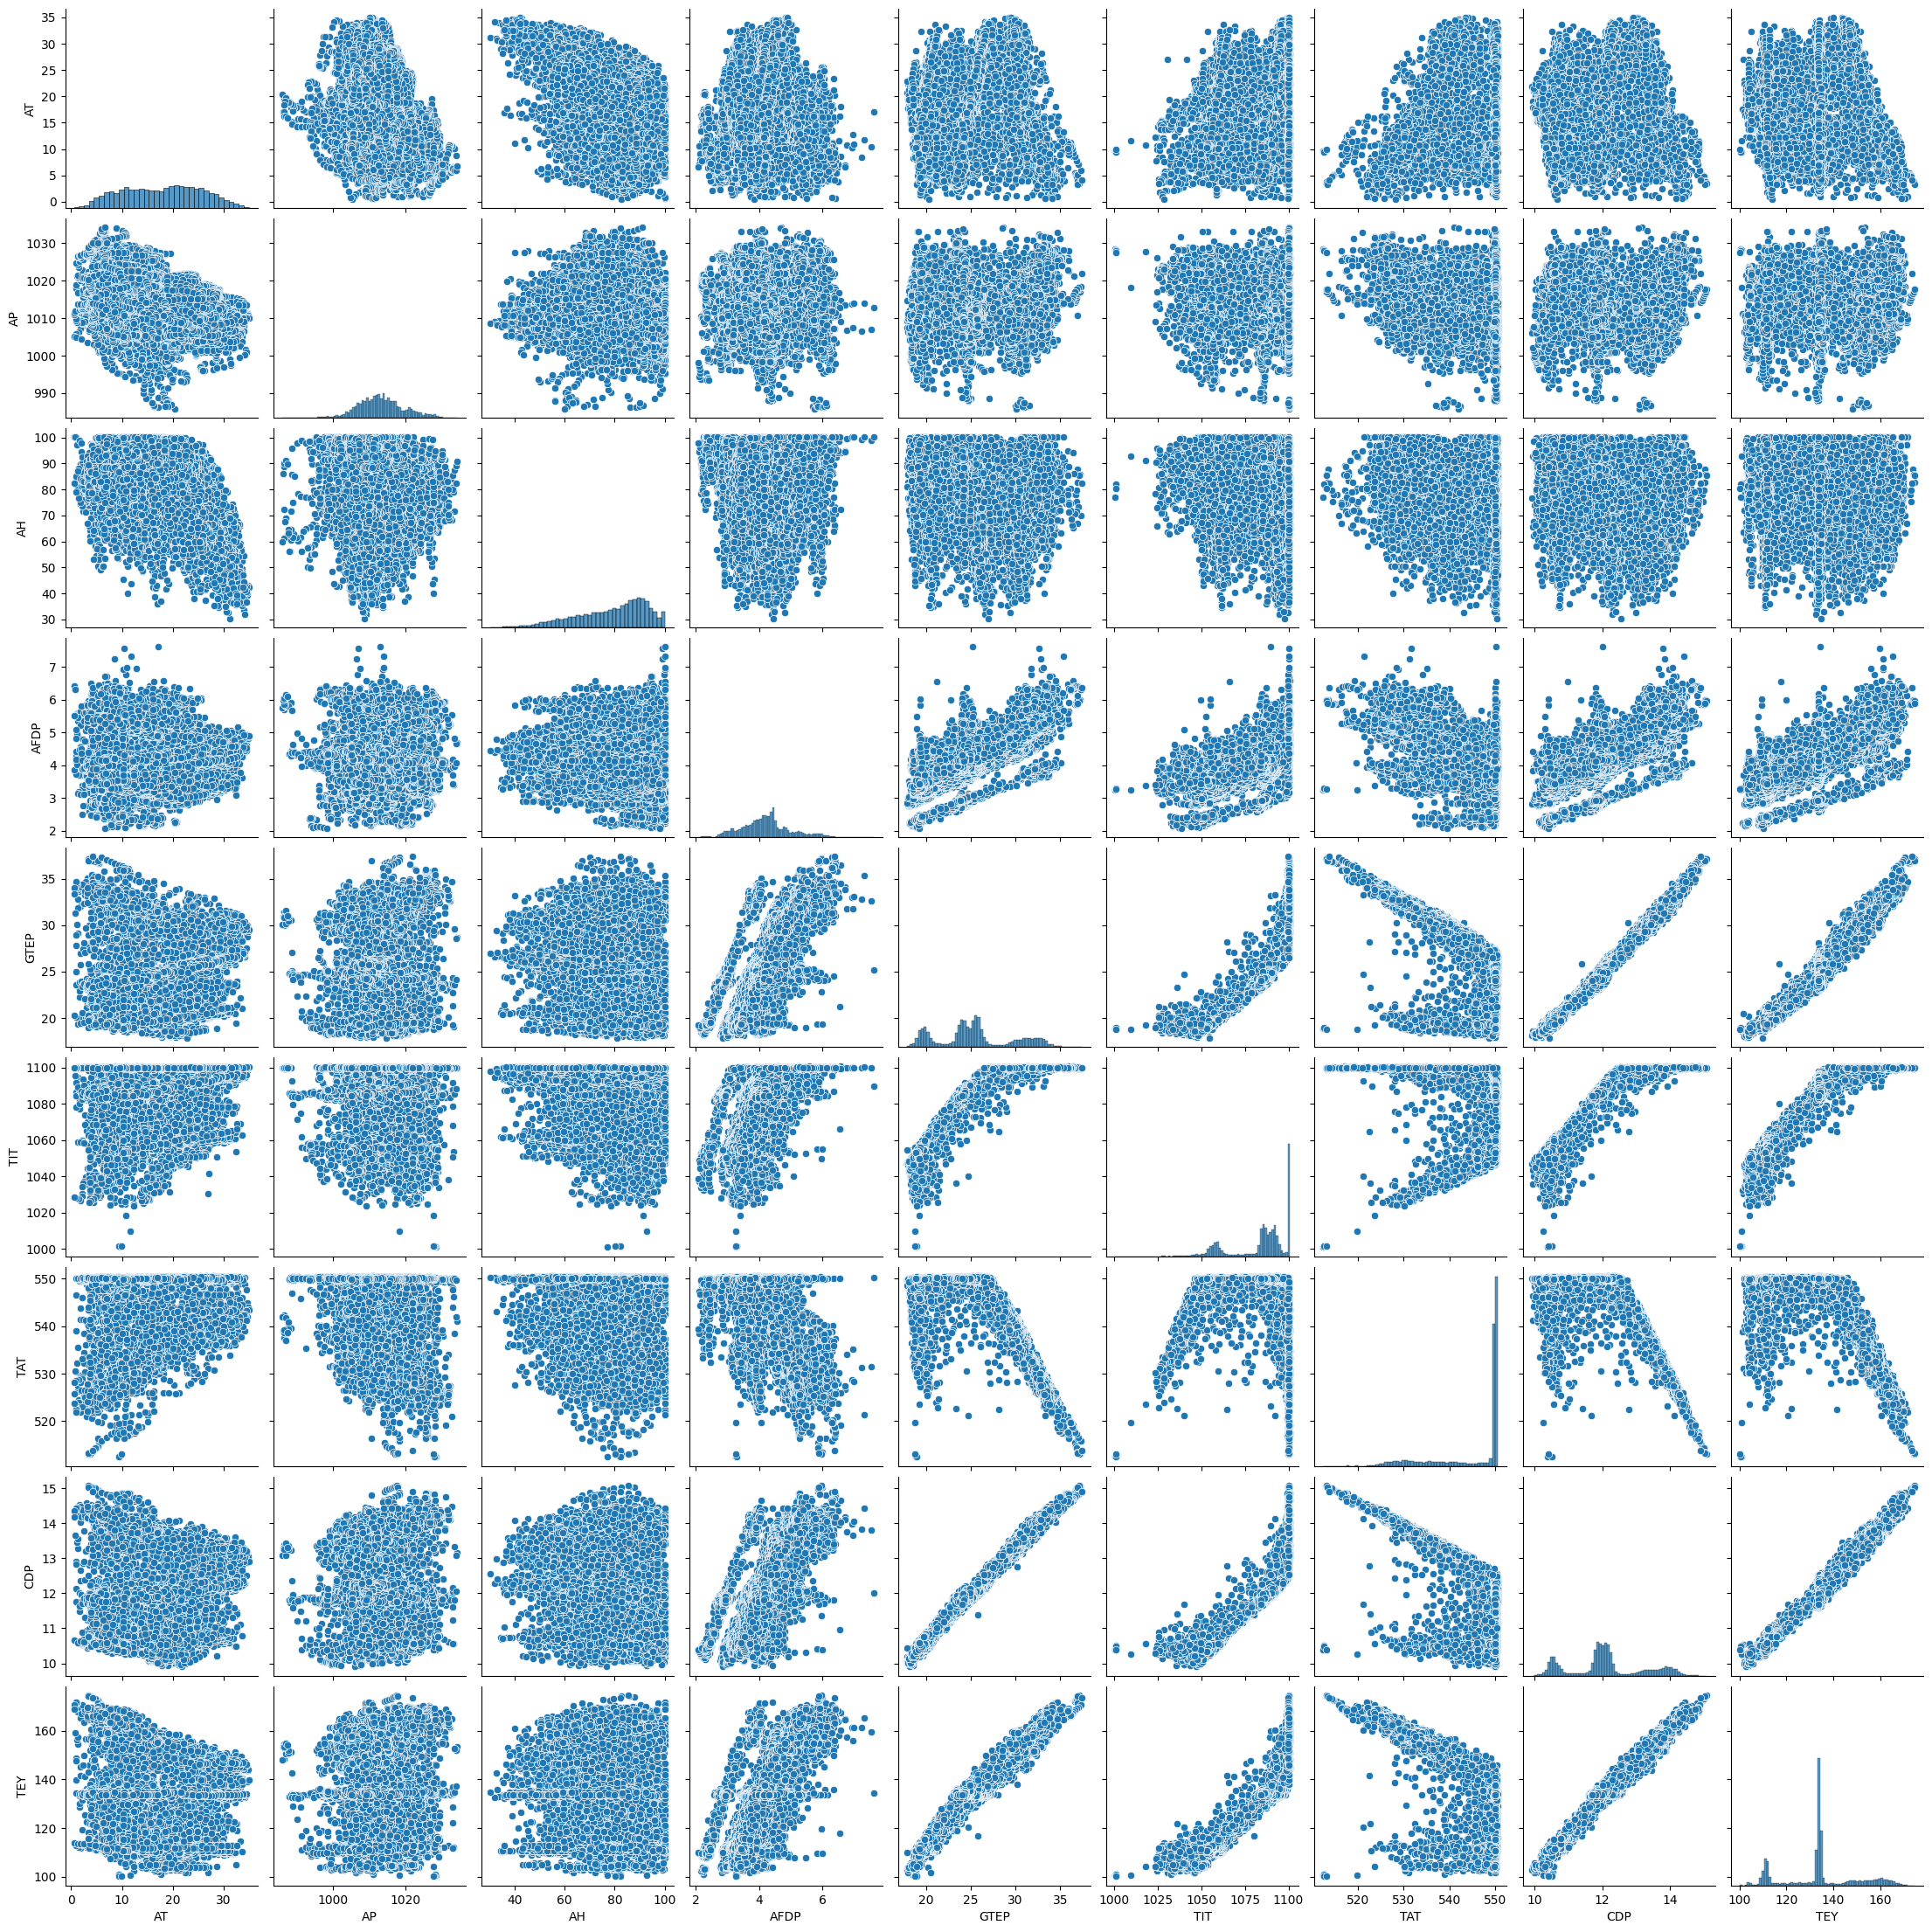

In [6]:
# Pairplot for selected columns
sns.pairplot(df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'TEY']])
plt.show()

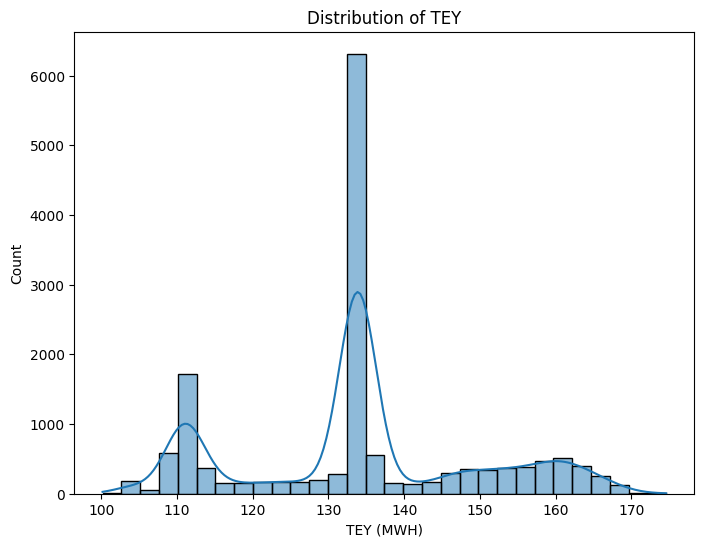

In [7]:
# Distribution of the target variable (TEY)
plt.figure(figsize=(8, 6))
sns.histplot(df['TEY'], bins=30, kde=True)
plt.title('Distribution of TEY')
plt.xlabel('TEY (MWH)')
plt.show()

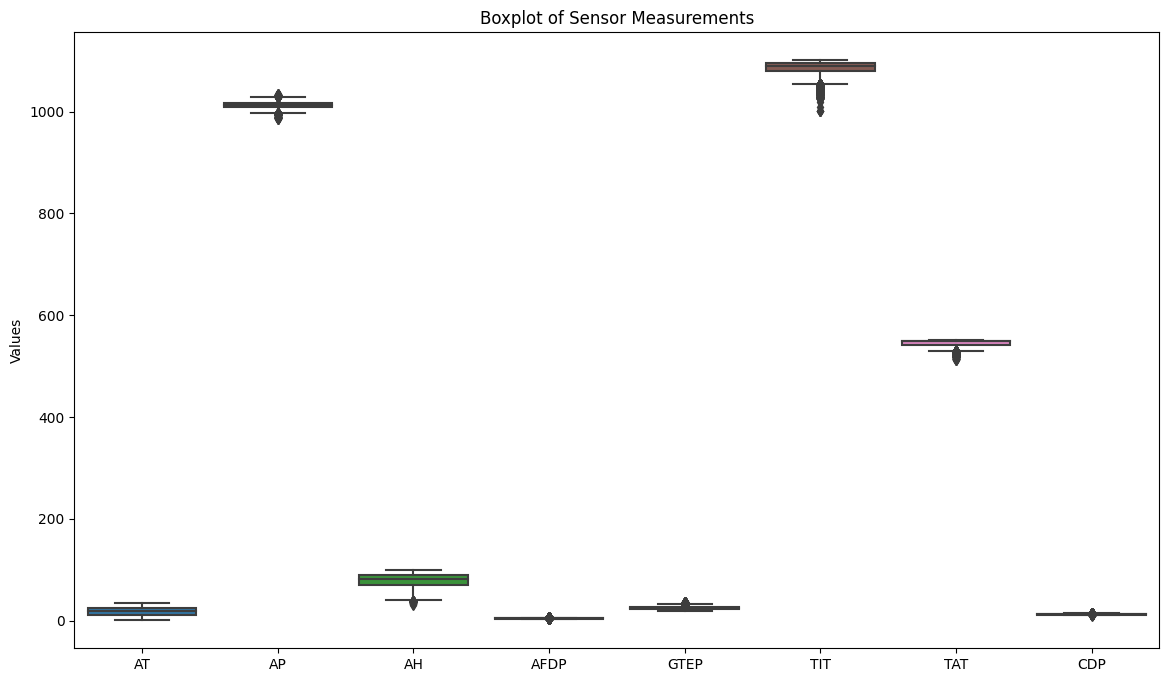

In [8]:
# Boxplot for each sensor measurement
sensor_columns = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP']
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[sensor_columns])
plt.title('Boxplot of Sensor Measurements')
plt.ylabel('Values')
plt.show()

In [9]:
df.shape

(15039, 11)

In [10]:
y=df.iloc[:,7]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [11]:
x=df.drop("TEY",axis=1)
x

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [12]:
# Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#used to fit values between 0 and 1
x_scaled = scaler.fit_transform(df.drop("TEY", axis=1))
x_scaled

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [13]:
# Data partition
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
model = Sequential()
model.add(Dense(15, input_dim=10,  activation='relu')) #input layer
model.add(Dense(1, activation='linear')) #output layer

In [16]:
# Compile the model with Mean Squared Error as a metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

In [17]:
# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_mean_squared_error', patience=20, restore_best_weights=True)

In [18]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.30, epochs=200, batch_size=32, callbacks=[early_stopping])

Epoch 1/200
264/264 [==============================] - 3s 5ms/step - loss: 17282.1074 - mean_squared_error: 17282.1074 - val_loss: 15271.3691 - val_mean_squared_error: 15271.3691
Epoch 2/200
264/264 [==============================] - 1s 3ms/step - loss: 12332.4795 - mean_squared_error: 12332.4795 - val_loss: 9083.2461 - val_mean_squared_error: 9083.2461
Epoch 3/200
264/264 [==============================] - 1s 3ms/step - loss: 6173.4507 - mean_squared_error: 6173.4507 - val_loss: 3572.7251 - val_mean_squared_error: 3572.7251
Epoch 4/200
264/264 [==============================] - 1s 3ms/step - loss: 1993.4651 - mean_squared_error: 1993.4651 - val_loss: 852.7949 - val_mean_squared_error: 852.7949
Epoch 5/200
264/264 [==============================] - 1s 3ms/step - loss: 420.3531 - mean_squared_error: 420.3531 - val_loss: 170.7234 - val_mean_squared_error: 170.7234
Epoch 6/200
264/264 [==============================] - 1s 3ms/step - loss: 116.6105 - mean_squared_error: 116.6105 - val_loss

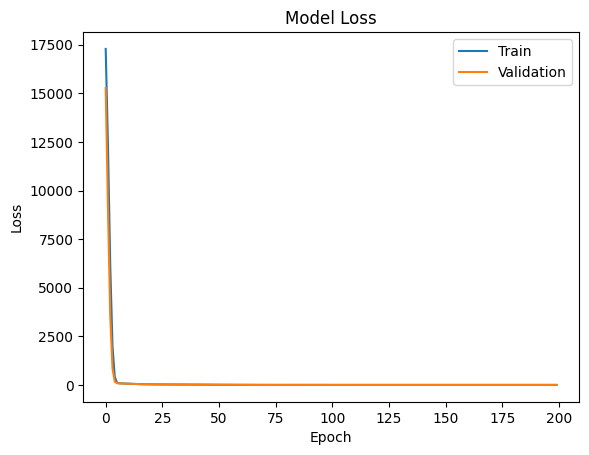

In [19]:
# Plot the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# QUESTION - 2(forestfires.csv file)

In [20]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [22]:
import pandas as pd
df = pd.read_csv("forestfires.csv")

In [23]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [24]:
df.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [26]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
df

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...     ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0   

     daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0         0       0       0       0       0       0         0         0   
1         0       0       0       0       1       0         0         0   
2         0       1       0       0       0       0         0         0   
3         0       0       0       0       0       0         0         0   
4         0       0       1       0       0       0         0         0   
..      ...     ...     ...     ...     ...     ...       ...       ...   
512       0       0       1       0       0       0         0         1   
513       0       0       1       0       0       0         0         1   
514       0       0       1       0       0       0         0         1   
515       0       1       0       0       0       0         0         1   
516       0       0       0       0       1       0         0         0   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep size_category  
0           0         0         0         small  
1           0         1         0         small  
2           0         1         0         small  
3           0         0         0         small  
4           0         0         0         small  
..        ...       ...       ...           ...  
512         0         0         0         large  
513         0         0         0         large  
514         0         0         0         large  
515         0         0         0         small  
516         1         0         0         small  

[517 rows x 31 columns]

In [29]:
y=df["area"]
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [30]:
x=df.drop("area",axis=1)
x

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  dayfri  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0       1   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0       0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0       0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2       1   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0       0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...     ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0       0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0       0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0       0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0       0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0       0   

     daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0         0       0       0       0       0       0         0         0   
1         0       0       0       0       1       0         0         0   
2         0       1       0       0       0       0         0         0   
3         0       0       0       0       0       0         0         0   
4         0       0       1       0       0       0         0         0   
..      ...     ...     ...     ...     ...     ...       ...       ...   
512       0       0       1       0       0       0         0         1   
513       0       0       1       0       0       0         0         1   
514       0       0       1       0       0       0         0         1   
515       0       1       0       0       0       0         0         1   
516       0       0       0       0       1       0         0         0   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep size_category  
0           0         0         0         small  
1           0         1         0         small  
2           0         1         0         small  
3           0         0         0         small  
4           0         0         0         small  
..        ...       ...       ...           ...  
512         0         0         0         large  
513         0         0         0         large  
514         0         0         0         large  
515         0         0         0         small  
516         1         0         0         small  

[517 rows x 30 columns]

In [37]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
label_encoder = LabelEncoder()
scaler=MinMaxScaler()
for column in df.columns:
    if column == "month" or column == "day" or column=='size_category':
        df[column] = label_encoder.fit_transform(df[column])
    else:
        if df[column].dtype in ['int64', 'float64']:
            df[column]=scaler.fit_transform(df[[column]])

In [38]:
df

month  day      FFMC       DMC        DC       ISI      temp        RH  \
0        7    0  0.870968  0.086492  0.101325  0.090909  0.192926  0.423529   
1       10    5  0.927742  0.118194  0.775419  0.119430  0.508039  0.211765   
2       10    2  0.927742  0.146795  0.796294  0.119430  0.398714  0.211765   
3        7    0  0.941935  0.110958  0.081623  0.160428  0.196141  0.964706   
4        7    3  0.910968  0.172984  0.110590  0.171123  0.295820  0.988235   
..     ...  ...       ...       ...       ...       ...       ...       ...   
512      1    3  0.811613  0.191592  0.771315  0.033868  0.823151  0.200000   
513      1    3  0.811613  0.191592  0.771315  0.033868  0.633441  0.658824   
514      1    3  0.811613  0.191592  0.771315  0.033868  0.610932  0.647059   
515      1    2  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647   
516      9    5  0.784516  0.006547  0.115867  0.019608  0.308682  0.188235   

         wind     rain      area  dayfri  daymon  daysat  daysun  daythu  \
0    0.700000  0.00000  0.000000     1.0     0.0     0.0     0.0     0.0   
1    0.055556  0.00000  0.000000     0.0     0.0     0.0     0.0     0.0   
2    0.100000  0.00000  0.000000     0.0     0.0     1.0     0.0     0.0   
3    0.400000  0.03125  0.000000     1.0     0.0     0.0     0.0     0.0   
4    0.155556  0.00000  0.000000     0.0     0.0     0.0     1.0     0.0   
..        ...      ...       ...     ...     ...     ...     ...     ...   
512  0.255556  0.00000  0.005904     0.0     0.0     0.0     1.0     0.0   
513  0.600000  0.00000  0.049769     0.0     0.0     0.0     1.0     0.0   
514  0.700000  0.00000  0.010231     0.0     0.0     0.0     1.0     0.0   
515  0.400000  0.00000  0.000000     0.0     0.0     1.0     0.0     0.0   
516  0.455556  0.00000  0.000000     0.0     0.0     0.0     0.0     0.0   

     daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  \
0       0.0     0.0       0.0       0.0       0.0       0.0       0.0   
1       1.0     0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0     0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0     0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0     0.0       0.0       0.0       0.0       0.0       0.0   
..      ...     ...       ...       ...       ...       ...       ...   
512     0.0     0.0       0.0       1.0       0.0       0.0       0.0   
513     0.0     0.0       0.0       1.0       0.0       0.0       0.0   
514     0.0     0.0       0.0       1.0       0.0       0.0       0.0   
515     0.0     0.0       0.0       1.0       0.0       0.0       0.0   
516     1.0     0.0       0.0       0.0       0.0       0.0       0.0   

     monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0         0.0       0.0       1.0       0.0       0.0       0.0       0.0   
1         0.0       0.0       0.0       0.0       0.0       1.0       0.0   
2         0.0       0.0       0.0       0.0       0.0       1.0       0.0   
3         0.0       0.0       1.0       0.0       0.0       0.0       0.0   
4         0.0       0.0       1.0       0.0       0.0       0.0       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
512       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
513       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
514       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
515       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
516       0.0       0.0       0.0       0.0       1.0       0.0       0.0   

     size_category  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
512              0  
513              0  
514              0  
515              1  
516              1  

[517 rows x 31 columns]

In [40]:
y=df["area"]
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    0.005904
513    0.049769
514    0.010231
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [41]:
x=df.drop("area",axis=1)
x

month  day      FFMC       DMC        DC       ISI      temp        RH  \
0        7    0  0.870968  0.086492  0.101325  0.090909  0.192926  0.423529   
1       10    5  0.927742  0.118194  0.775419  0.119430  0.508039  0.211765   
2       10    2  0.927742  0.146795  0.796294  0.119430  0.398714  0.211765   
3        7    0  0.941935  0.110958  0.081623  0.160428  0.196141  0.964706   
4        7    3  0.910968  0.172984  0.110590  0.171123  0.295820  0.988235   
..     ...  ...       ...       ...       ...       ...       ...       ...   
512      1    3  0.811613  0.191592  0.771315  0.033868  0.823151  0.200000   
513      1    3  0.811613  0.191592  0.771315  0.033868  0.633441  0.658824   
514      1    3  0.811613  0.191592  0.771315  0.033868  0.610932  0.647059   
515      1    2  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647   
516      9    5  0.784516  0.006547  0.115867  0.019608  0.308682  0.188235   

         wind     rain  dayfri  daymon  daysat  daysun  daythu  daytue  \
0    0.700000  0.00000     1.0     0.0     0.0     0.0     0.0     0.0   
1    0.055556  0.00000     0.0     0.0     0.0     0.0     0.0     1.0   
2    0.100000  0.00000     0.0     0.0     1.0     0.0     0.0     0.0   
3    0.400000  0.03125     1.0     0.0     0.0     0.0     0.0     0.0   
4    0.155556  0.00000     0.0     0.0     0.0     1.0     0.0     0.0   
..        ...      ...     ...     ...     ...     ...     ...     ...   
512  0.255556  0.00000     0.0     0.0     0.0     1.0     0.0     0.0   
513  0.600000  0.00000     0.0     0.0     0.0     1.0     0.0     0.0   
514  0.700000  0.00000     0.0     0.0     0.0     1.0     0.0     0.0   
515  0.400000  0.00000     0.0     0.0     1.0     0.0     0.0     0.0   
516  0.455556  0.00000     0.0     0.0     0.0     0.0     0.0     1.0   

     daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
..      ...       ...       ...       ...       ...       ...       ...   
512     0.0       0.0       1.0       0.0       0.0       0.0       0.0   
513     0.0       0.0       1.0       0.0       0.0       0.0       0.0   
514     0.0       0.0       1.0       0.0       0.0       0.0       0.0   
515     0.0       0.0       1.0       0.0       0.0       0.0       0.0   
516     0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category  
0         0.0       1.0       0.0       0.0       0.0       0.0              1  
1         0.0       0.0       0.0       0.0       1.0       0.0              1  
2         0.0       0.0       0.0       0.0       1.0       0.0              1  
3         0.0       1.0       0.0       0.0       0.0       0.0              1  
4         0.0       1.0       0.0       0.0       0.0       0.0              1  
..        ...       ...       ...       ...       ...       ...            ...  
512       0.0       0.0       0.0       0.0       0.0       0.0              0  
513       0.0       0.0       0.0       0.0       0.0       0.0              0  
514       0.0       0.0       0.0       0.0       0.0       0.0              0  
515       0.0       0.0       0.0       0.0       0.0       0.0              1  
516       0.0       0.0       0.0       1.0       0.0       0.0              1  

[517 rows x 30 columns]

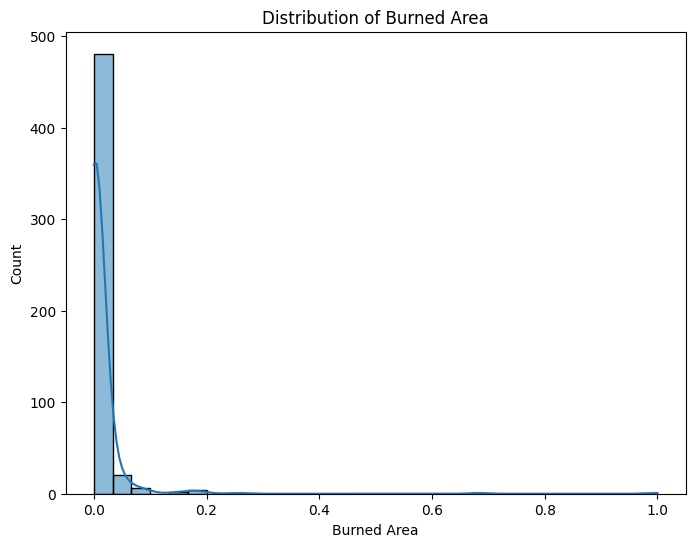

In [35]:
# Distribution of the target variable "area"
plt.figure(figsize=(8, 6))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('Burned Area')
plt.show()

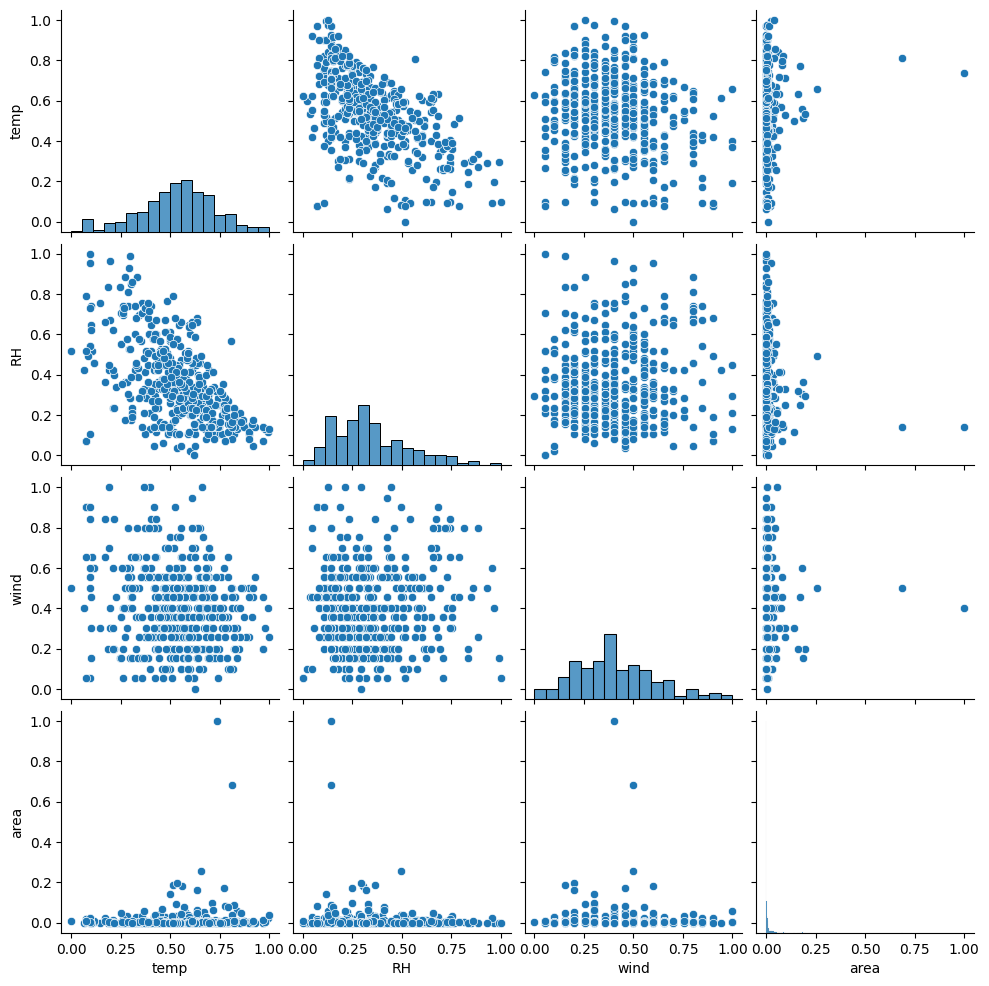

In [36]:
# Pairplot for selected numerical columns
numerical_cols = ['temp', 'RH', 'wind', 'area']
sns.pairplot(df[numerical_cols])
plt.show()

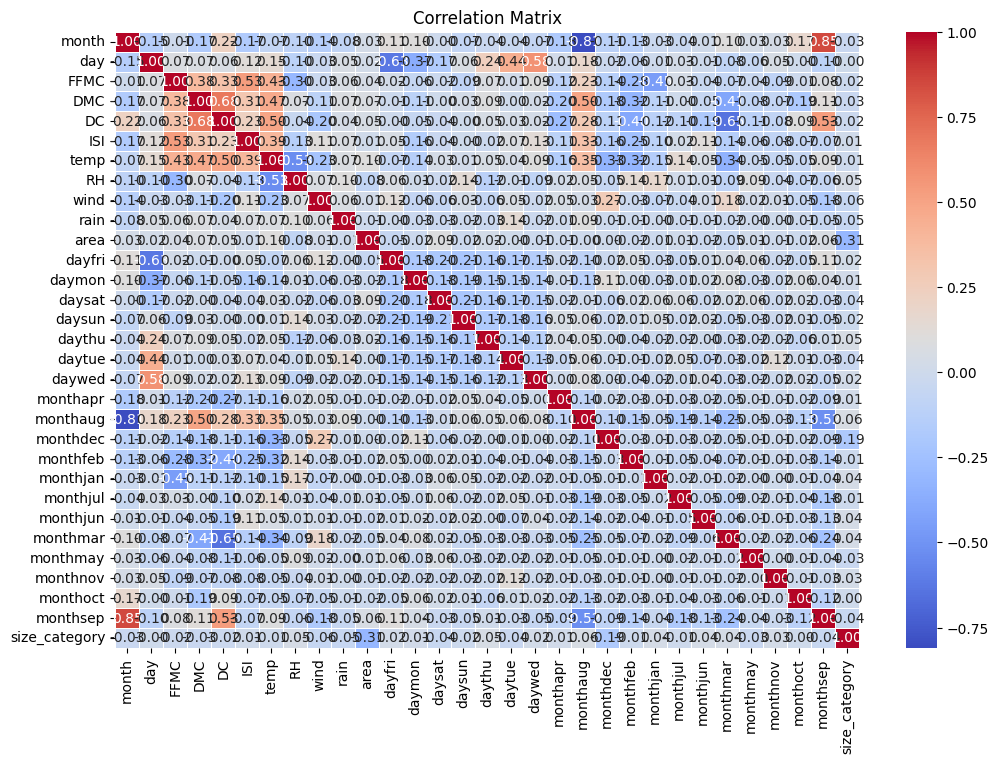

In [42]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

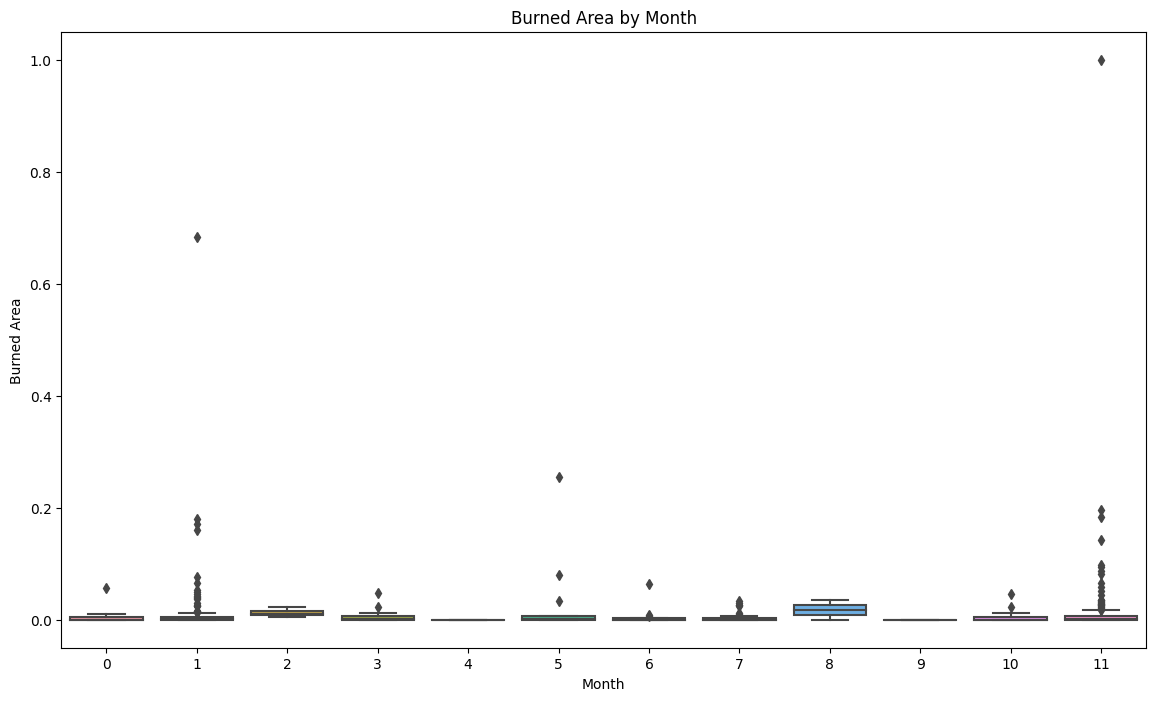

In [43]:
#Boxplot for categorical variables "month" and "day" against the target variable "area"
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='area', data=df)
plt.title('Burned Area by Month')
plt.xlabel('Month')
plt.ylabel('Burned Area')
plt.show()

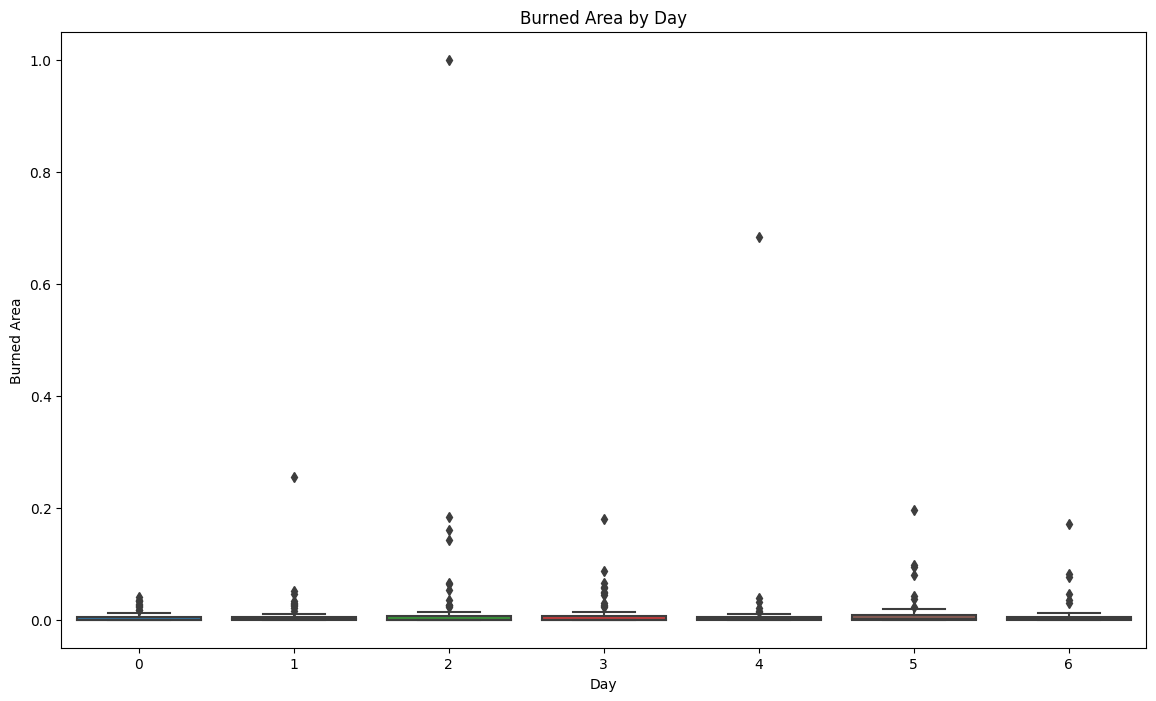

In [44]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='day', y='area', data=df)
plt.title('Burned Area by Day')
plt.xlabel('Day')
plt.ylabel('Burned Area')
plt.show()

In [45]:
# Data partition
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [46]:
len(x.columns)

30

In [47]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
# Build a neural network model
model = Sequential()
model.add(Dense(45, input_dim=30, activation="relu"))

model.add(Dense(68, input_dim=45, activation="relu"))

model.add(Dense(1, activation="linear"))

In [49]:
# Compile the model with Mean Squared Error as a metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

In [50]:
# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_mean_squared_error', patience=20, restore_best_weights=True)

In [53]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 8.8052e-04 - val_mean_squared_error: 8.8052e-04
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 8.7038e-04 - val_mean_squared_error: 8.7038e-04
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 9.0381e-04 - val_mean_squared_error: 9.0381e-04
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 8.8182e-04 - val_mean_squared_error: 8.8182e-04
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 9.3544e-04 - val_mean_squared_error: 9.3544e-04
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 9.9907e-04 - val_mean_squared_err

In [52]:
# Evaluate the model on the test set
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 6ms/step - loss: 0.0102 - mean_squared_error: 0.0102    
mean_squared_error: 1.02%


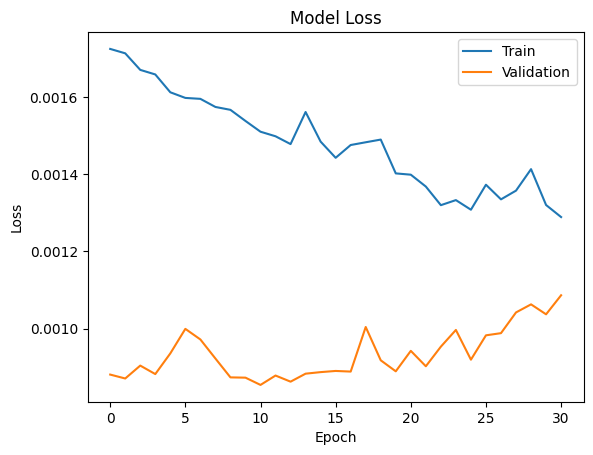

In [54]:
# Plot the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()